# Merge and read csv_files

In [1]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Keep only rows where Experiment == "SR"
df = df[df["Experiment"] == "SR_finger_tapping"]

# Show the combined DataFrame
print(df.head())

    Name         Experiment  Trial                       Sequence  \
120  liv  SR_finger_tapping      1  u f j h a v o g t e s l d i q   
121  liv  SR_finger_tapping      2  c f b g a o s d h j k y q x m   
122  liv  SR_finger_tapping      3  b q i u f z v c g m n e l h s   
123  liv  SR_finger_tapping      4  c a k e z f u q p v d o b i h   
124  liv  SR_finger_tapping      5  m q x p j s h n l u e a t i d   

              Recall  
120    u f j h a v o  
121  c f v g a o s d  
122    b g i q f z v  
123        c a k e z  
124    m q p x j s h  


In [2]:
df["points"] = 0   # initialize column
df["fails"] = [[] for _ in range(len(df))]  # initialize fails as empty lists

for idx, row in df.iterrows():
    seq = row["Sequence"].split()
    rec = row["Recall"].split()
    
    points = 0
    fails = []
    mistake_found = False
    
    for s, r in zip(seq, rec):
        if not mistake_found and s == r:
            points += 1
        elif s != r:
            fails.append((s, r))
            mistake_found = True  # lock the points counter
    
    # save results back into df
    df.at[idx, "points"] = points
    df.at[idx, "fails"] = fails

df.head(10)

,Name,Experiment,Trial,Sequence,Recall,points,fails
120,liv,SR_finger_tapping,1,u f j h a v o g t e s l d i q,u f j h a v o,7,[]
121,liv,SR_finger_tapping,2,c f b g a o s d h j k y q x m,c f v g a o s d,2,"[(b, v)]"
122,liv,SR_finger_tapping,3,b q i u f z v c g m n e l h s,b g i q f z v,1,"[(q, g), (u, q)]"
123,liv,SR_finger_tapping,4,c a k e z f u q p v d o b i h,c a k e z,5,[]
124,liv,SR_finger_tapping,5,m q x p j s h n l u e a t i d,m q p x j s h,2,"[(x, p), (p, x)]"
125,liv,SR_finger_tapping,6,q a e h y g u i t m n b j l o,q a e g h e i,3,"[(h, g), (y, h), (g, e), (u, i)]"
126,liv,SR_finger_tapping,7,u q p o b v g a t y h j s k n,u q b o p v,2,"[(p, b), (b, p)]"
127,liv,SR_finger_tapping,8,b z m h o a x f g t r p y s c,b z m o h a,3,"[(h, o), (o, h)]"
128,liv,SR_finger_tapping,9,o z x m g d s p n h j b k y f,o z x m g d s,7,[]
129,liv,SR_finger_tapping,10,y f u r z q c a g x d t m o s,y f u r z k s,5,"[(q, k), (c, s)]"


# Confusion matrix

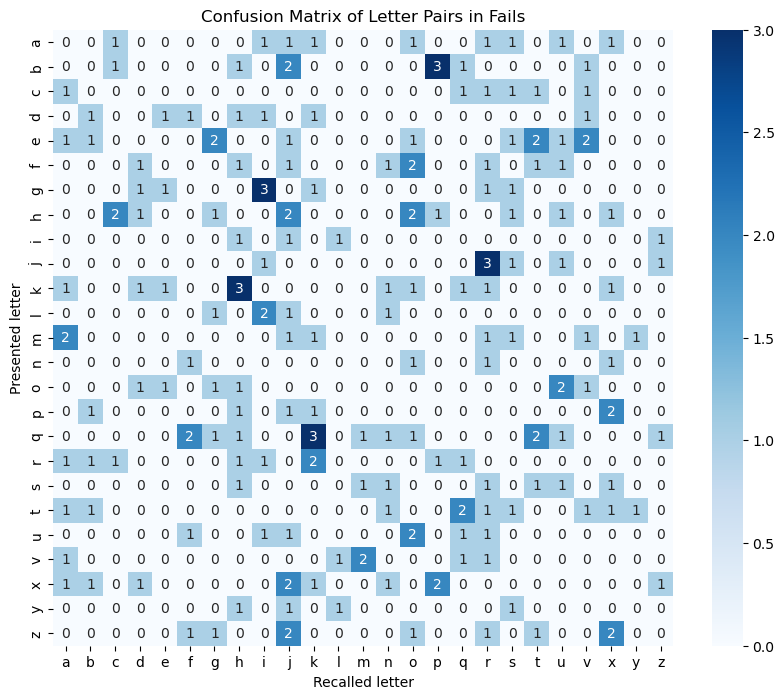

In [3]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

# Flatten all (s, r) pairs in fails column
all_fails = [pair for sublist in df["fails"] for pair in sublist]

# Count occurrences of each (s, r) pair
fail_counts = Counter(all_fails)

# Get sorted unique letters for axis labels
letters = sorted(set([s for s, _ in all_fails] + [r for _, r in all_fails]))

# Create confusion matrix DataFrame
conf_matrix = pd.DataFrame(0, index=letters, columns=letters)
for (s, r), count in fail_counts.items():
    conf_matrix.loc[s, r] = count

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Recalled letter")
plt.ylabel("Presented letter")
plt.title("Confusion Matrix of Letter Pairs in Fails")
plt.show()